# sns Lighning Talk Demo 
Group 21, Plotters for Success

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Today, we will demonstrate the Capabilities of Seaborn using a dataset for NBA shots in the 2024 season. We will be highlighting 3 main functions of seaborn:
1. **Heatmaps**
2. **Built-in** Statistical Functions
3. **Multiplot**


In [2]:
data = pd.read_csv('NBA_2024_Shots.csv')
data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


## Heatmaps

## Built-In Statistical Functions

**Preparing Dataset**

We are then using the built-in statistical functions to establish relationships.

To demonstrate this, we are going to get shots from a few top players and relate it to the distance. To start, we isolated the columns of interest: **Name, Shot Distance, Player Name**

In [3]:
subset = data[['PLAYER_NAME', 'SHOT_DISTANCE', 'SHOT_MADE'] ]
subset = subset.sort_values(by='PLAYER_NAME')
print(subset)

            PLAYER_NAME  SHOT_DISTANCE  SHOT_MADE
171653      A.J. Lawson              3      False
174692      A.J. Lawson              0       True
174759      A.J. Lawson              3       True
172639      A.J. Lawson              0       True
172268      A.J. Lawson              5      False
...                 ...            ...        ...
87107   Zion Williamson              3      False
86032   Zion Williamson              2      False
86034   Zion Williamson              1       True
87104   Zion Williamson              2       True
81366   Zion Williamson              8      False

[218701 rows x 3 columns]


We isolated the top 10 most frequent shooters in the NBA

In [4]:
unique_names = subset['PLAYER_NAME'].value_counts()
top_5 = unique_names.head(5).index.tolist()
print(top_5)


['Luka Doncic', 'Jalen Brunson', 'Anthony Edwards', "De'Aaron Fox", 'Shai Gilgeous-Alexander']


We will now generate a list of pandas dataset for made shots and failed shots

In [55]:

true_list = []
false_list=[]
shot_list= []
for player in top_5:
    player_shots = subset[subset['PLAYER_NAME'] == player]
    shots_by_bool = player_shots.groupby(['SHOT_DISTANCE', 'SHOT_MADE']).size().reset_index(name='Occurrences')
    shot_list.append(shots_by_bool)
    true_list.append(shots_by_bool[shots_by_bool['SHOT_MADE']==True])
    false_list.append(shots_by_bool[shots_by_bool['SHOT_MADE']==False])

# Print Luka Doncic's stats

print(top_5[0])
print('Number of Shots Made at each distance')
print(true_list[0].head())

print('Number of Shots Missed at each distance')
print(false_list[0].head())

Luka Doncic
Number of Shots Made at each distance
   SHOT_DISTANCE  SHOT_MADE  Occurrences
1              0       True           48
3              1       True           78
5              2       True           44
7              3       True           32
9              4       True           25
Number of Shots Missed at each distance
   SHOT_DISTANCE  SHOT_MADE  Occurrences
0              0      False           12
2              1      False            7
4              2      False           15
6              3      False           30
8              4      False           11


In [56]:
mini = subset.groupby(['SHOT_DISTANCE', 'PLAYER_NAME', 'SHOT_MADE']).size().reset_index(name='Occurrences')
mini = mini[mini['PLAYER_NAME'].isin(top_5)]
print(mini.head())

     SHOT_DISTANCE      PLAYER_NAME  SHOT_MADE  Occurrences
47               0  Anthony Edwards      False           20
48               0  Anthony Edwards       True           75
212              0     De'Aaron Fox      False            7
213              0     De'Aaron Fox       True           33
392              0    Jalen Brunson      False           12


From there, we will plot the relationships for the players

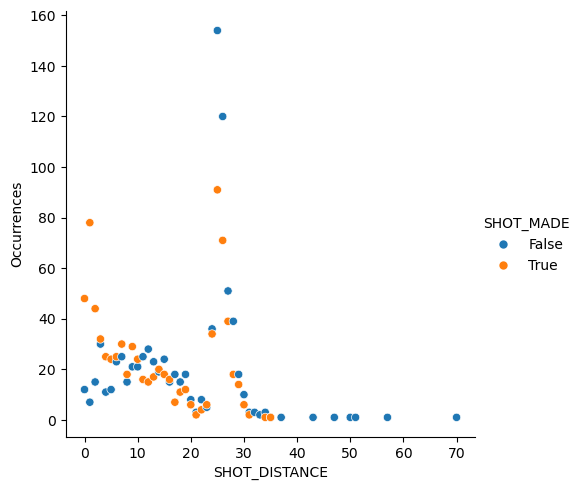

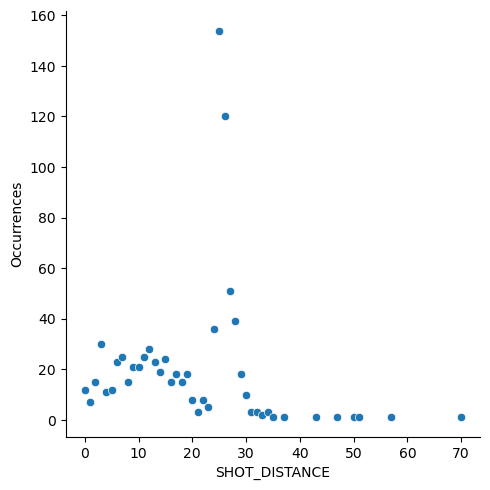

In [8]:
sns.relplot(data = shot_list[0], x = "SHOT_DISTANCE", y = "Occurrences",  hue = 'SHOT_MADE')
sns.relplot(data = false_list[0], x = "SHOT_DISTANCE", y = "Occurrences")
# sns.scatterplot(data = mini, x = "SHOT_DISTANCE", y = "Occurrences",  hue ='PLAYER_NAME', style= 'SHOT_MADE')
# sns.lmplot(data = mini, x = "SHOT_DISTANCE", y = "Occurrences",  hue ='PLAYER_NAME', order = 2)
# grid = sns.JointGrid(data = mini, x = "SHOT_DISTANCE", y = "Occurrences")
# grid.plot(sns.regplot, sns.boxplot)

## Multiplot